In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load dataset

## 1.Train set





In [2]:
import pandas as pd
import numpy as np

#Train set
df_train = pd.read_excel('/content/drive/MyDrive/IE403/UIT-VSMEC/train_nor_811.xlsx')
df_train

,Unnamed: 0,Emotion,Sentence
0,188,Other,cho mình xin bài nhạc tên là gì với ạ
1,166,Disgust,cho đáng đời con quỷ . về nhà lôi con nhà mày ...
2,1345,Disgust,lo học đi . yêu đương lol gì hay lại thích học...
3,316,Enjoyment,uớc gì sau này về già vẫn có thể như cụ này :))
4,1225,Enjoyment,mỗi lần có video của con là cứ coi đi coi lại ...
...,...,...,...
5543,1332,Disgust,đường của nhà cụ hay sao mà cụ cấm người ta đỗ...
5544,825,Other,nhìn mặt héo queo luôn
5545,165,Other,tao đi xe máy mỗi lần muốn để xe đi đâu là phi...
5546,363,Enjoyment,thích thân hình boss rồi nhan 😌


## 2.Test set

In [3]:
#Test set
df_test = pd.read_excel('/content/drive/MyDrive/IE403/UIT-VSMEC/test_nor_811.xlsx')
df_test

,Unnamed: 0,Emotion,Sentence
0,713,Sadness,người ta có bạn bè nhìn vui thật
1,1827,Surprise,cho nghỉ viêc mói đúng sao goi là kỷ luật
2,1166,Disgust,kinh vãi 😡
3,228,Fear,nhà thì không xa lắm nhưng chưa bao giờ đi vì ...
4,1942,Anger,bố không thích nộp đấy mày thích ý kiến không
...,...,...,...
688,432,Sadness,lúc thì cuốc đất è cổ ra không có giun mà câu ...
689,178,Enjoyment,các bác dẫn crush qua cây sữa nay mà hứng nước...
690,1863,Surprise,vợ chồng rồi mà trong sáng như này chỉ có tron...
691,476,Other,bep này vào binh dương dùng xuất


# Methodology

## 1.Naive Bayes (MultinomialNB)

In [4]:
X_train = df_train["Sentence"]
X_test = df_test["Sentence"]
X_train, X_test

(0                   cho mình xin bài nhạc tên là gì với ạ
 1       cho đáng đời con quỷ . về nhà lôi con nhà mày ...
 2       lo học đi . yêu đương lol gì hay lại thích học...
 3         uớc gì sau này về già vẫn có thể như cụ này :))
 4       mỗi lần có video của con là cứ coi đi coi lại ...
                               ...                        
 5543    đường của nhà cụ hay sao mà cụ cấm người ta đỗ...
 5544                               nhìn mặt héo queo luôn
 5545    tao đi xe máy mỗi lần muốn để xe đi đâu là phi...
 5546                      thích thân hình boss rồi nhan 😌
 5547    ước mơ nhỏ nhoi của tao là được làm chị mà khô...
 Name: Sentence, Length: 5548, dtype: object,
 0                       người ta có bạn bè nhìn vui thật
 1              cho nghỉ viêc mói đúng sao goi là kỷ luật
 2                                             kinh vãi 😡
 3      nhà thì không xa lắm nhưng chưa bao giờ đi vì ...
 4          bố không thích nộp đấy mày thích ý kiến không
               

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_vector = vectorizer.fit_transform(X_train).toarray()
X_test_vector = vectorizer.transform(X_test).toarray()
X_train_vector, X_test_vector

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(df_train["Emotion"])
y_test = le.fit_transform(df_test["Emotion"])
y_train, y_test

(array([4, 1, 1, ..., 4, 2, 5]),
 array([5, 6, 1, 3, 0, 4, 4, 2, 4, 4, 4, 2, 1, 2, 5, 4, 1, 2, 4, 2, 3, 4,
        2, 2, 6, 1, 5, 4, 2, 4, 6, 4, 5, 4, 6, 2, 4, 1, 1, 2, 0, 1, 1, 4,
        2, 2, 5, 2, 5, 0, 6, 0, 3, 2, 4, 1, 3, 4, 1, 2, 5, 2, 0, 5, 2, 4,
        1, 5, 2, 3, 1, 0, 4, 3, 5, 2, 2, 5, 4, 5, 3, 3, 2, 5, 3, 4, 2, 1,
        4, 0, 2, 0, 2, 1, 2, 4, 2, 1, 2, 2, 5, 1, 1, 1, 2, 2, 3, 4, 4, 2,
        5, 2, 2, 1, 2, 2, 2, 0, 2, 0, 5, 2, 4, 2, 2, 0, 4, 5, 5, 1, 5, 5,
        3, 4, 2, 4, 2, 1, 2, 4, 2, 2, 4, 1, 2, 1, 2, 4, 2, 2, 0, 3, 6, 1,
        5, 5, 2, 2, 5, 5, 2, 2, 2, 5, 2, 2, 3, 2, 2, 6, 2, 6, 2, 2, 2, 1,
        2, 5, 1, 4, 1, 1, 5, 4, 2, 5, 3, 4, 1, 4, 0, 2, 2, 4, 2, 0, 1, 5,
        2, 2, 1, 2, 4, 5, 5, 3, 4, 5, 4, 2, 5, 1, 6, 6, 1, 2, 1, 6, 1, 1,
        1, 2, 4, 4, 2, 1, 1, 3, 6, 5, 2, 2, 1, 1, 3, 3, 2, 4, 5, 3, 2, 2,
        5, 4, 1, 5, 2, 4, 0, 2, 4, 5, 4, 0, 5, 2, 5, 4, 3, 1, 5, 1, 3, 4,
        2, 4, 4, 2, 2, 4, 1, 4, 3, 4, 4, 2, 2, 4, 2, 4, 2, 1, 2, 1, 6, 2,
     

In [7]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train_vector, y_train)
y_pred = model.predict(X_test_vector)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4531024531024531

In [8]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.47      0.56      0.51       132
           2       0.41      0.86      0.56       193
           3       0.00      0.00      0.00        46
           4       0.49      0.29      0.36       129
           5       0.65      0.32      0.43       116
           6       0.00      0.00      0.00        37

    accuracy                           0.45       693
   macro avg       0.29      0.29      0.27       693
weighted avg       0.40      0.45      0.39       693



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_test, y_pred)
cm_nb

array([[  0,  25,   6,   0,   6,   3,   0],
       [  0,  74,  44,   0,  10,   4,   0],
       [  0,  13, 166,   1,  10,   3,   0],
       [  0,   9,  29,   0,   4,   4,   0],
       [  0,  19,  67,   0,  37,   6,   0],
       [  0,   9,  64,   0,   6,  37,   0],
       [  0,   7,  27,   0,   3,   0,   0]])

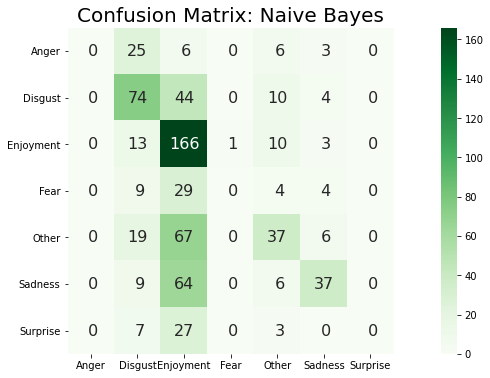

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(17,6))
plt.title('Confusion Matrix: Naive Bayes', fontsize=20)
cm_tp_nb = confusion_matrix(y_test, y_pred)
df_cm_tp_nb = pd.DataFrame(cm_tp_nb, index=np.unique(le.inverse_transform(y_train)), columns=np.unique(le.inverse_transform(y_train)))
sns.heatmap(df_cm_tp_nb, annot=True, square=True, annot_kws={"size": 16}, fmt='2g', cmap='Greens')


## 2.Random Forest

## 3.LSTM

## 4.CNN

## 5.PhoBERT